## 过拟合与欠拟合

过拟合的现象：模型在留出验证数据上的性能总是在几轮后达到最高点，然后开始下降。
欠拟合的现象：训练数据上的损失越小，测试数据上的损失也越小

#### **优化与泛化的概念**  

**优化:** 指调节模型以在训练数据上得到最佳性能  
**泛化：** 是指训练好的模型在前所未见的数据上的性能好坏，机器学习的目的当然是得到良好的泛化。

#### 如何解决过拟合的问题

- 最优解决方法是获取更多的训练数据
- 次优解决方法是正则化：调节模型允许存储的信息量（对模型允许存储的信息加以约束）

主要的正则化的方法：

- 减小网络大小
- 添加权重正则化
- 添加 dropout 正则化


### 减小网络大小

防止过拟合的最简单的方法就是减小模型大小，即减少模型中可学习参数的个数（这由层数和每层的单元个数决定）。其实这个方法的原则是：减少参数的容量。
为什么这样可以：
例如，拥有 500 000 个二进制参数的模型，能够轻松学会 MNIST 训练集中所有数字对应的类别——我们只需让 50 000 个数字每个都对应 10 个二进制参数。但这种模型对于新数字样本的分类毫无用处。对于新的数据就无法获得很好泛化。

这里需要理解地方：*深度学习模型通常都很擅长拟合训练数据，但真正的挑战在于泛化，而不是拟合。

关于网络的大小的确定，这里没有标准的公式：确定最佳层数或每层的最佳大小。一般都是通过试验：从小到大的测试参数。最终再确定一个大小。

如下案例：可以很直观的看出：更小的网络开始过拟合的时间要晚于更大的网络，更大的网络过拟合也更严重。其验证损失的波动也更大。


In [4]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# 将整数序列编码为二进制矩阵
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

# 将数据进行变换成矩阵
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# 标准的优化器
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) # 训练过程中监控精度

In [31]:
# 验证集的製作
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5336 - acc: 0.7724 - val_loss: 0.4036 - val_acc: 0.8606
Epoch 2/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3181 - acc: 0.8996 - val_loss: 0.3130 - val_acc: 0.8826
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2305 - acc: 0.9250 - val_loss: 0.2832 - val_acc: 0.8885
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1813 - acc: 0.9423 - val_loss: 0.3131 - val_acc: 0.8736
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1500 - acc: 0.9520 - val_loss: 0.2786 - val_acc: 0.8884
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1221 - acc: 0.9631 - val_loss: 0.3101 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1014 - acc: 0.9701 - val_loss: 0.3046 - 

In [34]:
history_dict = history.history



In [36]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

# 标准的优化器
model2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) # 训练过程中监控精度

In [37]:

history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history_dict2 = history2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5767 - acc: 0.7502 - val_loss: 0.4703 - val_acc: 0.8505
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3927 - acc: 0.8911 - val_loss: 0.3857 - val_acc: 0.8668
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2995 - acc: 0.9193 - val_loss: 0.3310 - val_acc: 0.8826
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2426 - acc: 0.9337 - val_loss: 0.2982 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.2038 - acc: 0.9416 - val_loss: 0.2908 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1745 - acc: 0.9509 - val_loss: 0.2831 - val_acc: 0.8892
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1506 - acc: 0.9585 - val_loss: 0.2798 - 

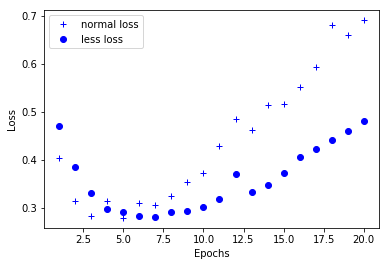

In [40]:
# 绘制训练损失贺验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values_normal = history_dict['val_loss']
loss_values_less = history_dict2['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values_normal,'b+',label='normal loss')
plt.plot(epochs,loss_values_less,'bo',label='less loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 添加权重正则化

#### 奥卡姆剃刀（Occam’s razor）原理

[奥卡姆剃刀（Occam’s razor）原理](http://wikipedia.moesalih.com/Occam%27s_Razor)
如果一件事情有两种解释，那么最可能正确的解释就是最简单的那个，即假设更少的那个。

对于神经网络模型也适应：：给定一些训练数据和一种网络架构，很多组权重值（即很多模型）都可以解释这些数据。简单模型比复杂模型更不容易过拟合。

这里的简单模型是指：参数值分布的熵更小的模型（或参数更少的模型），所以根据这个知道原则：常见的降低过拟合的方法就是强制让模型权重只能取较小的值这种方法叫作权重正则化（weight regularization）

#### 作权重正则化实现方法

向网络损失函数中添加与较大权重值相关的成本：
-  L1 正则化（L1 regularization）：添加的成本与权重系数的绝对值成正比。
-  L2 正则化（L2 regularization）：添加的成本与权重系数的平方（权重的 L2 范数）成正比，神经网络的 L2 正则化也叫权重衰减（weight decay）

在 Keras 中，添加权重正则化的方法是向层传递权重正则化项实例,coding 如下：


In [51]:
##权重正则化
from keras import models
from keras import layers
from keras import regularizers

model3 = models.Sequential()
# 权重矩阵的每个系数都会使网络总损失增加 0.001  *  weight_coefficient_value
model3.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu',input_shape=(10000,)))
model3.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))

# 标准的优化器
model3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) # 训练过程中监控精度

In [52]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history_dict3 = history3.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.5432 - acc: 0.7969 - val_loss: 0.4162 - val_acc: 0.8752
Epoch 2/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.3477 - acc: 0.9024 - val_loss: 0.3506 - val_acc: 0.8856
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2856 - acc: 0.9224 - val_loss: 0.3319 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2476 - acc: 0.9365 - val_loss: 0.3577 - val_acc: 0.8754
Epoch 5/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2323 - acc: 0.9400 - val_loss: 0.3420 - val_acc: 0.8837
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2112 - acc: 0.9513 - val_loss: 0.3387 - val_acc: 0.8847
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2046 - acc: 0.9499 - val_loss: 0.3572 - 

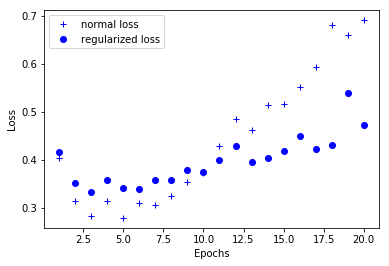

In [53]:
# 绘制训练损失贺验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values_normal = history_dict['val_loss']
loss_values_regularized = history_dict3['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values_normal,'b+',label='normal loss')
plt.plot(epochs,loss_values_regularized,'bo',label='regularized loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#还可以使用其它的权重正则化

from keras import regularizers
# L1 正则化
regularizers.l1(0.001)
# L1 与 L2同时正则化
regularizers.l1_l2(l1=0.001,l2=0.001)

### dropout 正则化

dropout 是神经网络最有效也最常用的正则化方法之一。对某一层使用 dropout，就是在训练过程中随机将该层的一些输出特征舍弃（设置为 0）。dropout 比率（dropout rate）是被设为 0 的特征所占的比例，通常在 0.2~0.5
范围内。在测试的时候不能使用该方法。

![训练时对激活矩阵使用 dropout](imgs/03.jpg)  



该方法的核心思想是：在层的输出值中引入噪声，打破不显著的偶然模式（Hinton 称之为阴谋）。如果没有噪声的话，网络将会记住这些偶然模式。coding 实现如下：


In [55]:
##权重正则化
from keras import models
from keras import layers
from keras import regularizers

model4 = models.Sequential()
# 权重矩阵的每个系数都会使网络总损失增加 0.001  *  weight_coefficient_value
model4.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu',input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1,activation='sigmoid'))

# 标准的优化器
model4.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) # 训练过程中监控精度

In [56]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history_dict4 = history4.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.6789 - acc: 0.6217 - val_loss: 0.5885 - val_acc: 0.8316
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.5753 - acc: 0.7507 - val_loss: 0.4902 - val_acc: 0.8680
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.4976 - acc: 0.8207 - val_loss: 0.4294 - val_acc: 0.8757
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.4347 - acc: 0.8607 - val_loss: 0.3914 - val_acc: 0.8776
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3911 - acc: 0.8840 - val_loss: 0.3624 - val_acc: 0.8842
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3598 - acc: 0.9027 - val_loss: 0.3526 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3296 - acc: 0.9151 - val_loss: 0.3524 - 

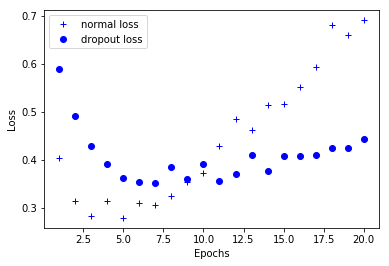

In [57]:
# 绘制训练损失贺验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values_normal = history_dict['val_loss']
loss_values_dropout = history_dict4['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values_normal,'b+',label='normal loss')
plt.plot(epochs,loss_values_dropout,'bo',label='dropout loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()